In [548]:
import numpy as np 
import pandas as pd 

In [549]:
train = pd.read_csv('train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [550]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [551]:
train_x = train.drop(['Survived'], axis= 1)
train_y = train.Survived

In [552]:
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [553]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [554]:
test_x= test.copy()

In [555]:
test_x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [556]:
test_x.Age.value_counts()

21.00    17
24.00    17
22.00    16
30.00    15
18.00    13
         ..
0.83      1
22.50     1
26.50     1
40.50     1
60.50     1
Name: Age, Length: 79, dtype: int64

In [557]:
test_x.Fare.value_counts()

7.7500      21
26.0000     19
8.0500      17
13.0000     17
7.8958      11
            ..
31.6833      1
16.0000      1
53.1000      1
146.5208     1
20.2500      1
Name: Fare, Length: 169, dtype: int64

In [558]:
a=list(test_x.Fare)
a

[7.8292,
 7.0,
 9.6875,
 8.6625,
 12.2875,
 9.225,
 7.6292,
 29.0,
 7.2292,
 24.15,
 7.8958,
 26.0,
 82.2667,
 26.0,
 61.175,
 27.7208,
 12.35,
 7.225,
 7.925,
 7.225,
 59.4,
 3.1708,
 31.6833,
 61.3792,
 262.375,
 14.5,
 61.9792,
 7.225,
 30.5,
 21.6792,
 26.0,
 31.5,
 20.575,
 23.45,
 57.75,
 7.2292,
 8.05,
 8.6625,
 9.5,
 56.4958,
 13.4167,
 26.55,
 7.85,
 13.0,
 52.5542,
 7.925,
 29.7,
 7.75,
 76.2917,
 15.9,
 60.0,
 15.0333,
 23.0,
 263.0,
 15.5792,
 29.125,
 7.8958,
 7.65,
 16.1,
 262.375,
 7.8958,
 13.5,
 7.75,
 7.725,
 262.375,
 21.0,
 7.8792,
 42.4,
 28.5375,
 263.0,
 7.75,
 7.8958,
 7.925,
 27.7208,
 211.5,
 211.5,
 8.05,
 25.7,
 13.0,
 7.75,
 15.2458,
 221.7792,
 26.0,
 7.8958,
 10.7083,
 14.4542,
 7.8792,
 8.05,
 7.75,
 23.0,
 13.9,
 7.775,
 52.0,
 8.05,
 26.0,
 7.7958,
 78.85,
 7.925,
 7.8542,
 8.05,
 55.4417,
 26.0,
 7.75,
 7.775,
 8.5167,
 22.525,
 7.8208,
 7.75,
 8.7125,
 13.0,
 15.0458,
 7.7792,
 31.6792,
 7.2833,
 221.7792,
 14.4542,
 6.4375,
 16.7,
 75.2417,
 26.0,
 

# Feature Engineering

In [559]:
#delete not important features 
train_x=train_x.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
test_x=test_x.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [560]:
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [561]:
train_x.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [562]:
from sklearn.preprocessing import LabelEncoder

In [563]:
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    le.fit(train_x[col].fillna('NA'))
    
    train_x[col]= le.transform(train_x[col].fillna('NA'))
    test_x[col] = le.transform(test_x[col].fillna('NA'))

In [564]:
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [565]:
train_x.Embarked.value_counts()

3    644
0    168
2     77
1      2
Name: Embarked, dtype: int64

In [566]:
from xgboost import XGBClassifier

In [567]:
model = XGBClassifier(n_estimators=20, random_state=71, use_label_encoder=False)
model.fit(train_x, train_y)

[15:06:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=12, num_parallel_tree=1, random_state=71,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [568]:
pred= model.predict_proba(test_x)[:,1] 

In [569]:
pred_label=np.where(pred>0.5,1,0)

In [570]:
submission= pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_label})
submission.to_csv('submission_first.csv', index= False)

# Model Validation

In [571]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

In [572]:
scores_acc=[]
scores_logloss=[]

In [573]:
kf= KFold(n_splits= 4, shuffle= True, random_state= 71)
for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    model = XGBClassifier(n_esimators=20, random_state= 71, use_label_encoder= False)
    model.fit(tr_x, tr_y)
    
    va_pred= model.predict_proba(va_x)[:,1]
    
    logloss= log_loss(va_y, va_pred)
    accuracy= accuracy_score(va_y, va_pred>0.5)
    
    scores_acc.append(accuracy)
    scores_logloss.append(logloss)

[15:06:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { n_esimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:06:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { n_esimators } might not be used.

In [574]:
logloss= np.mean(scores_logloss)
acc= np.mean(scores_acc)
print(f'logloss: {logloss: .4f}, accuracy:{accuracy: .4f}')

logloss:  0.5196, accuracy: 0.8153


# Model Tuning

In [575]:
import itertools
import warnings

In [576]:
#grid search
param_space={
    'max_depth': [3,5,7],
    'min_child_weight':[1.0,2.0,4.0]
}

#조합을 만들 때는 itertools를 이용하면 빠르다 
param_combinations= itertools.product(param_space['max_depth'], param_space['min_child_weight'])
params=[]
scores=[]

for max_depth, min_child_weight in param_combinations:
    score_folds=[]
    #cross validation 
    kf= KFold(n_splits=4, shuffle=True, random_state=123456)
    for tr_idx, va_idx in kf.split(train_x):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        
        model = XGBClassifier(n_estimators=20, random_state=71, use_label_encoder=False, max_depth= max_depth, 
                             min_child_weight= min_child_weight)
        model.fit(tr_x, tr_y)
        
        va_pred=model.predict_proba(va_x)[:,1]
        #성능지표로는 log_loss
        logloss= log_loss(va_y, va_pred)
        score_folds.append(logloss)
        
    score_mean= np.mean(score_folds)
    
    params.append((max_depth, min_child_weight))
    scores.append(score_mean)
#np.argsort를 통해 원하는 정렬 값의 '인덱스'를 구할 수 있음 
best_idx= np.argsort(scores)[0]
best_param=params[best_idx]
print(f'max_depth: {best_param[0]}, min_child_weight:{best_param[1]}')


[15:06:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[15:06:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [577]:
import seaborn as sns
import matplotlib.pyplot as plt

In [578]:
from sklearn.preprocessing import OneHotEncoder
#로지스틱 회귀는 GBDT 모델과 달리 Input의 정규화 과정이 필수 
train_x2= train.drop(['Survived'], axis=1)
test_x2= test.copy()
train_x2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [579]:
test_x2.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [580]:
#feature deletion |
train_x2= train_x2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_x2= test_x2.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)

In [581]:
#Sex, Embarked, Plcass 에 대한 one-hot encoding 수행 
cols= ['Sex', 'Embarked', 'Pclass']
ohe= OneHotEncoder(categories='auto', sparse=False )
ohe.fit(train_x2[cols].fillna('NA'))

#one-hot encoding 열 이름 생성
ohe_cols= []
for i, c in enumerate(cols):
    ohe_cols+=[f'{c}_{v}' for v in ohe.categories_[i]]

In [582]:
#one-hot encoding에 대한 변환 수행
ohe_train_x2 = pd.DataFrame(ohe.transform(train_x2[cols].fillna('NA')), columns=ohe_cols)
ohe_test_x2= pd.DataFrame(ohe.transform(test_x2[cols].fillna('NA')), columns = ohe_cols)

In [583]:
#one-hot encoding 수행 후 원래 특징 제거 및 이러한 과정을 거친 데이터 프레임과 기존 데이터 프레임 결합 
train_x2= train_x2.drop(cols, axis=1)
test_x2= test_x2.drop(cols, axis=1)
train_x2= pd.concat([train_x2, ohe_train_x2], axis=1)
test_x2= pd.concat([test_x2, ohe_test_x2], axis=1)

In [584]:
train_x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          714 non-null    float64
 1   SibSp        891 non-null    int64  
 2   Parch        891 non-null    int64  
 3   Fare         891 non-null    float64
 4   Sex_female   891 non-null    float64
 5   Sex_male     891 non-null    float64
 6   Embarked_C   891 non-null    float64
 7   Embarked_NA  891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
 10  Pclass_1     891 non-null    float64
 11  Pclass_2     891 non-null    float64
 12  Pclass_3     891 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 90.6 KB


In [585]:
test_x2.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [586]:
train_x2.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [587]:
train_x2.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [588]:
train_x2.head(10)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_NA,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,NaN,0,0,8.4583,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,2.0,3,1,21.0750,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,27.0,0,2,11.1333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,14.0,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [589]:
train_x2.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='count'>

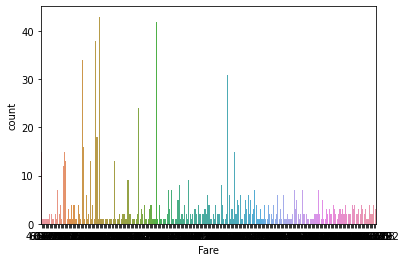

In [590]:
sns.countplot(x= train_x2.Fare, data= train_x2)

In [591]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [592]:
#결측치 문제 해결 
train_x2['Age'].fillna(train_x2['Age'].mean(), inplace=True)
train_x2['Age']= np.ceil(train_x2['Age'])
test_x2['Age'].fillna(test_x2['Age'].mean(), inplace=True)
test_x2['Age']= np.ceil(test_x2['Age'])



In [593]:
train_x2['Age'].describe()

count    891.000000
mean      29.771044
std       13.002476
min        1.000000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [594]:
train_x2['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [595]:
#Fare 값을 로그변환하여 표준편차를 낮춤 (map 함수 이용) 
train_x2['Fare']=train_x2['Fare'].map(lambda x: np.log(x+1) if x!=0 else 0)
test_x2['Fare']=test_x2['Fare'].map(lambda x: np.log(x+1) if x!=0 else 0)

In [599]:
test_x2['Fare']=test_x2['Fare'].fillna(0)

In [600]:
test_x2.Fare.describe()

count    418.000000
mean       3.008871
std        0.978026
min        0.000000
25%        2.185579
50%        2.737881
75%        3.480373
max        6.240917
Name: Fare, dtype: float64

In [601]:
#앙상블 
from sklearn.linear_model import LogisticRegression 

#xgboost model 
model_xgb = XGBClassifier(n_estimators= 20, random_state=71)
model_xgb.fit(train_x, train_y)
pred_xgb= model_xgb.predict_proba(test_x)[:,1]


#Logistic Regression 
model_lr= LogisticRegression(solver='lbfgs', max_iter=300)
model_lr.fit(train_x2, train_y)
pred_lr= model_lr.predict_proba(test_x2)[:,1]

#xgb가 성능이 평균적으로 더 좋으므로 가중치를 부여함 
pred= pred_xgb*0.8+pred_lr*0.2
pred_label = np.where(pred>0.5,1,0)

[15:06:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hwang/opt/anaconda3/envs/kaggle_practice/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [602]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_label})
submission.to_csv('submission_first_ensemble.csv', index=False)